# Finding Patterns in Gasoline & Diesel Prices Over The Years
   by Eriberto Contreras
***

# Plan:
- Acquire
- Prepare
- Explore
- Model
- Summarize Conclusions and Recommendations.

***

# Description:
   Over the years the prices of gasoline and diesel have increased and have fluctuated without any clear answers as to why. Just today we have prices ranging from the low 4 dollar range to the high 7 dollar ranges based on the state that one resides in. I will be using some time series analysis to see if we can find key factors from our past which can let us make better planning decicions in the future.

***

# Overview:
- Purpose: To identify paterns in gas prices over time to predict future prices.
- Data: The prices that we will be looking at today are the ideal median price over the USA from the year 1995-2021
- Prices vary state by state, specially because of taxing at a state and local level, for that reason I have decided to stick to median prices over the country.

- Gasoline: 
    year: 1956 = 1.12 dollars a gallon. 
    year: 2021 = 2.33 dollars a gallon.
- Diesel:
    year: 1956 = 1.10 dollars a gallon.
    year: 2021 = 2.63 dollars a gallon.

Data was collected in the following links:
- [Gasoline & Diesel prices](https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021)
- [State minimum wage](https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017)
- [Federal minimum wage](https://www.kaggle.com/datasets/brandonconrady/us-minimum-wage-1938-2020)

***

# Objectives:
- Perform a Time Series Analysis on the Gasoline and Diesel prices.
- Notate and mark down the takeaways from the vizual data.
- Find key patterns that we can used for future predictions.
- Give recomendations that can benefit both consumers and companies that heavily rely on fuel for their energy and travel needs.
- Make all steps reproducable so that future data science teams can conclude equal results.
***

# Project Summary:
During the process of acquiring fuel, federal wage, and state minimum wage data, I realize that for this specific time series analysis we would only require the prices of gasoline & Diesel prices over the last couple of years. The existing data frame that resulted from acquiring the data can be successfully used for future data science experiments and other types of modeling.

Throuhgout the exploration and visualization process I realize that extreme economic events like the 2008 economic crash played huge factors in gas price drops. 
# Conclusion
In conclusion, because of extreme factors like this I was not successful in making a good predictive model that had a huge success rate.

My recommendations for the future would be to collect more data over the next comming years, wait to see if results of the current inflation in our economic state returns a similar result as the last and build a better predictive figure and model.
- The other recommendation that we can explore is to use other modeling and explorartion techniques using relationships that exists in the original csv file to predict the prices.
***
### Imports Necessary To Run Code -

In [1]:
# coding imports
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
from statsmodels.tsa.api import Holt
import acquire
import prepare
import explore


***

# Acquire:
  - [Gasoline & Diesel prices](https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021)
  - [State minimum wage](https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017)
  - [Federal minimum wage](https://www.kaggle.com/datasets/brandonconrady/us-minimum-wage-1938-2020)
  - using the following links and running the [acquire.py file](https://github.com/EribertoContreras/gas_prices_project/blob/main/acquire.py) to merge the data and crate one large csv file and data set with a function named all_gas_data( )

In [2]:
#importing unprepared data and renaming it as df
df = acquire.all_gas_data()

In [3]:
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


- Takeaways:
    - 73278 rows
    - 43 collumns
    - Has a year column but no date

***
# Prepare

The prepare data process:
   - 'A1' column was renamed to 'gasoline' to give it better representation.
   - 'D1' columnn was renamed to 'diesel' to give it better representation.
   - All other collumns were dropped since we will only be focusing on Gasoline and Diesel prices for this time series model.

In [4]:
#preparing data
df = prepare.prep_gas_data(df)
# dropping month column
df = df.drop(columns=['month'])
df

,gasoline,diesel
Date,,
1995-01-02,1.127,1.104
1995-01-09,1.134,1.102
1995-01-16,1.126,1.100
1995-01-23,1.132,1.095
1995-01-30,1.131,1.090
...,...,...
2020-11-30,2.211,2.502
2020-12-07,2.246,2.526
2020-12-14,2.247,2.559


- Takeaways:
    - Dates range from jan, 1995 - dec, 2020
    - 2 columns left are 'gasoline' and 'diesel'
    - 73278 rows
    - No null values present and there was no need to add remove_null functions.
***

# Splitting Data
   Splitting Data into Train, Validate, Test.
   - Train size is %50 of data
   - Validate size is %30 of the data
   - test size is %20 of the data

In [5]:
# importing split function to get train, validate, test data for modeling
train, validate, test = explore.split_data(df)

### Description For:
### Train

In [6]:
train.describe()

,gasoline,diesel
count,114.000000,114.000000
mean,1.653678,1.629971
std,0.588067,0.626134
min,0.968333,0.961667
25%,1.229250,1.164833
50%,1.472083,1.418083
75%,1.939250,1.930667
max,3.160833,3.357833


### Validate

In [7]:
validate.describe()

,gasoline,diesel
count,113.000000,113.000000
mean,2.913935,3.175065
std,0.583532,0.647202
min,1.737667,2.010333
25%,2.451833,2.569667
50%,2.781667,3.056667
75%,3.494167,3.842500
max,4.122333,4.684167


### Test

In [8]:
test.describe()

,gasoline,diesel
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


***

# Explore &
# Visualizing The Data

## Lineplot
Observing and visualizing Gasoline prices over time(hourly, 15 day, 6 week, and yearly time periods), using linear plots.

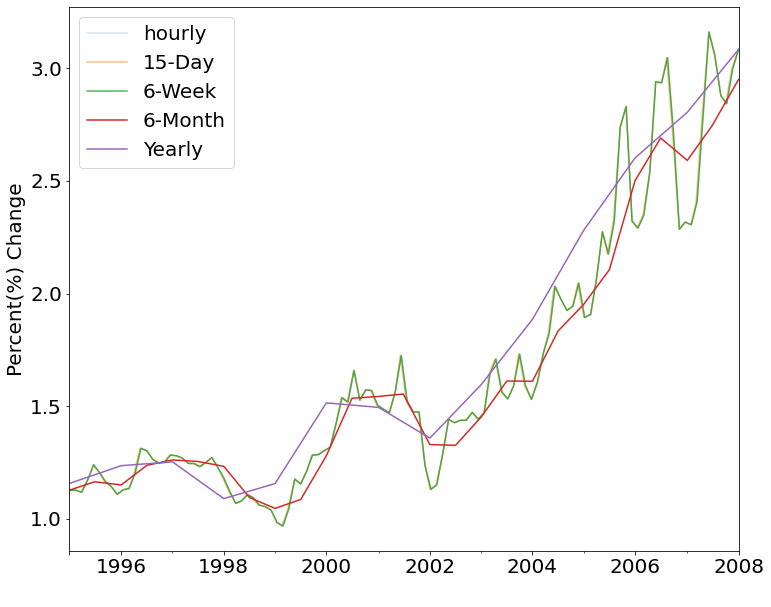

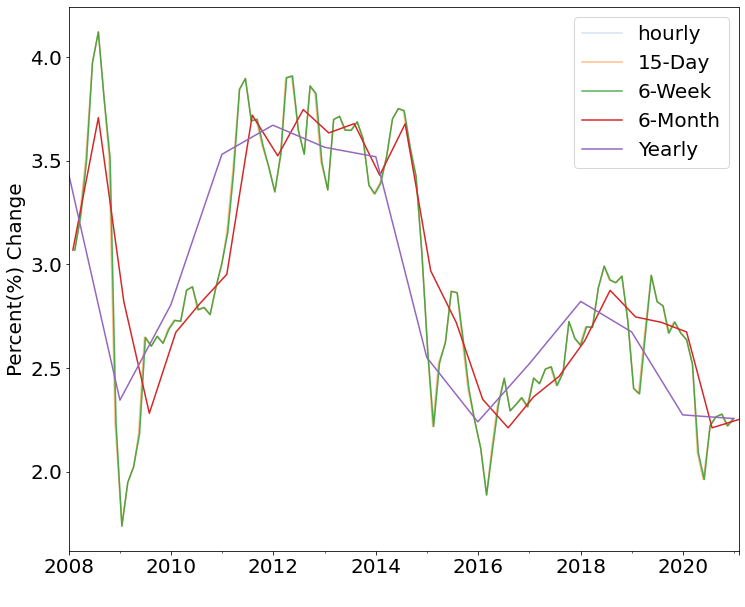

In [9]:
explore.viz1(train)
explore.viz2(validate)

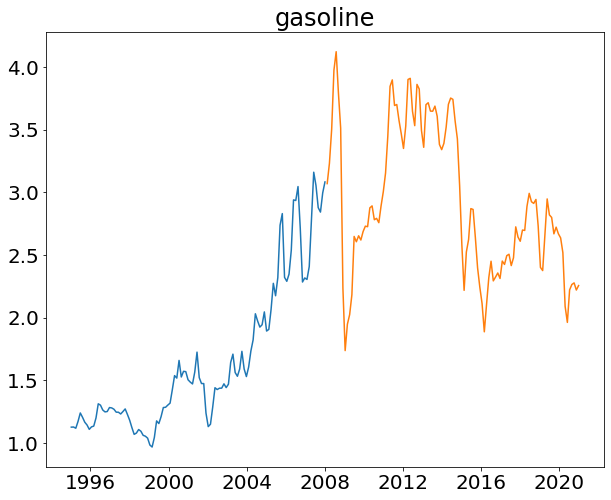

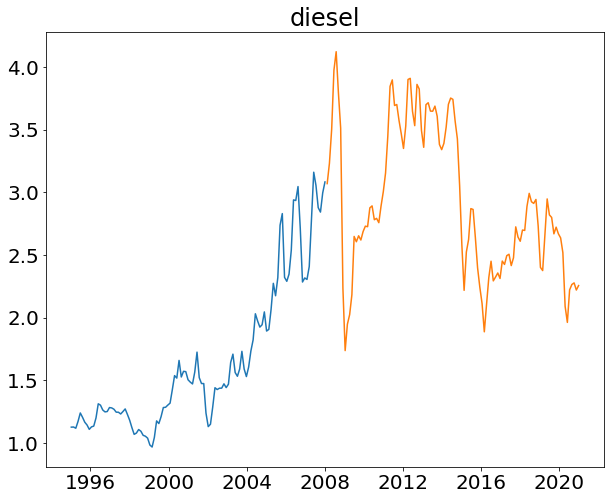

In [10]:
for col in train.columns:
    # gasoine and diesel Train/validate/Test
    plt.figure(figsize=(10,8))
    plt.title(f'{col}')
    plt.plot(train['gasoline'])
    plt.plot(validate['gasoline'])
    plt.show()

### Takeaways:
- From late 1998 to 2008, there was an increase in gasoline prices.
- Late 2008 there was an extreme drop in gas prices that didnt recover to normal levels till 2011
- 2014 and 2020 we can see that there were more drops in gas prices.
- the prices seem to be more static and change in 15 day to 6 week periods bs 6 month and yearly.

### Next:
## Volitility
We will visualize the volitilty of gas price percentage change over a 6 week time period.

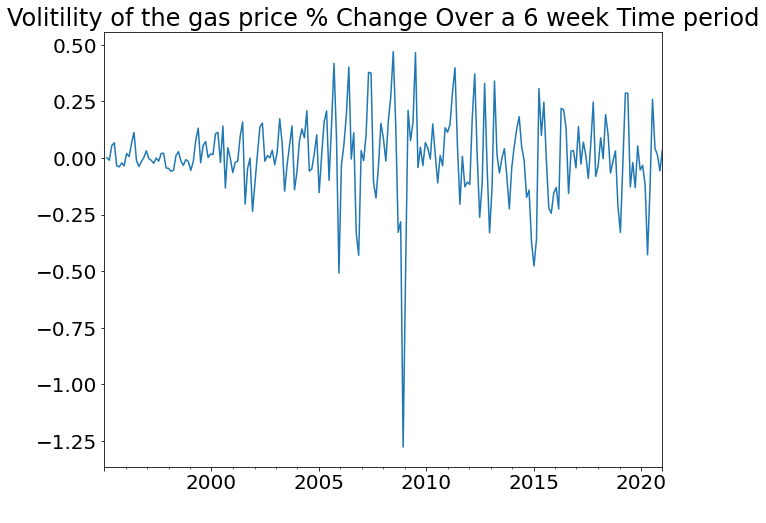

In [11]:
explore.viz4(df)

### Takeaways:
- between 2005 and 2010:
    - highest increases in price percentage
    - lowest drop in price percentage

## Next:
## Boxplot
We will visualize the gasoline price change by month on the train data set.

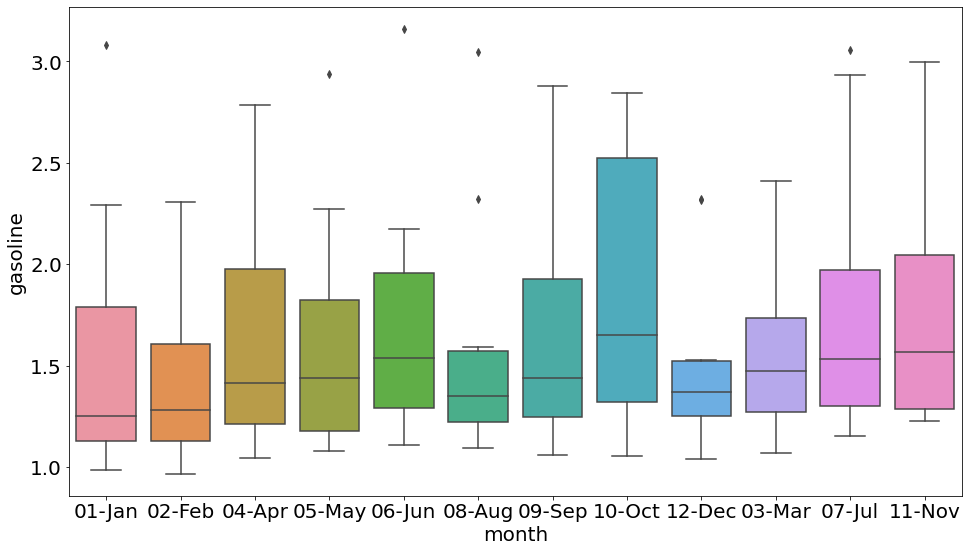

In [12]:
explore.viz5(train)

### Takeaways:
- Overall the rest of the months seem to have a range within a 1 and 3 dollars in gas prices
- the month of october being the highest in the 3rd quartile

## Next:
## Autocorrelation
We will check to see if there is a seaonality with an autocorrelation plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

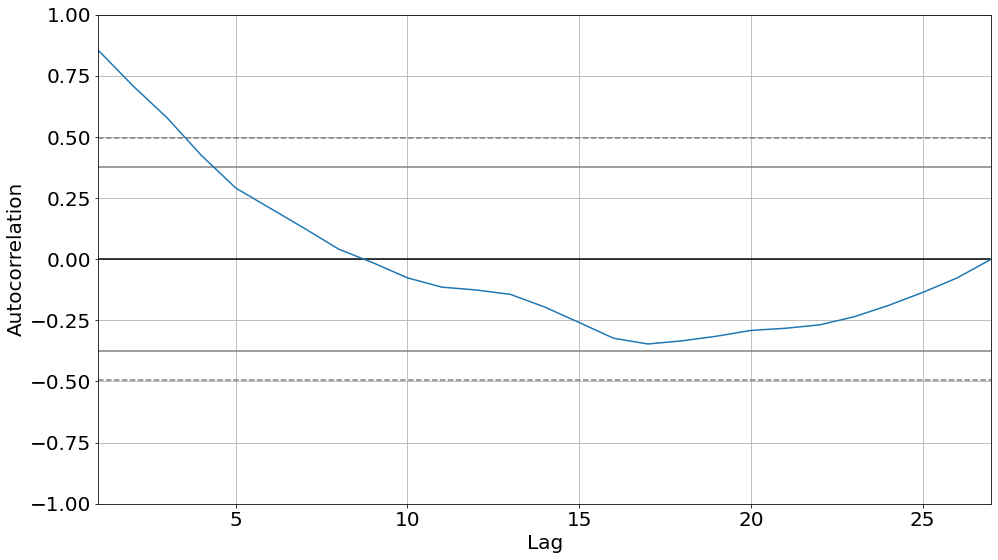

In [13]:
y = train.gasoline
pd.plotting.autocorrelation_plot(y.resample('6m').mean())

### Takeaways:
- there seems to be a an autocorrelation in the 6 month time period but there is no trend that is picked up.

***
# Exploration Summary:
- From late 1998 to 2008, there was an increase in gasoline prices.
- Late 2008 there was an extreme drop in gas prices that didnt recover to normal levels till 2011
- The years 2014 and 2020 we can see that there were more drops in gas prices.
- between 2005 and 2010:
    - highest increases in price percentage
    - lowest drop in price percentage
- Overall the rest of the months seem to have a range within a 1 and 3 dollars in gas prices
- there seems to be a an autocorrelation in the 6 month time period but there is no trend that is picked up.
- We can observe that the higher the price peaks over a lesser period of time, the bigger the price drop will be. causes for this can be inflation or some outside element that has effect on this market.

***
# MVP
We will be sticking to our original plan and be focusing on gas prices to see if we can use previous price data throughout time to make a model that can predict future prices.

# Modeling:
Modeling will be conducted on gasoline prices.

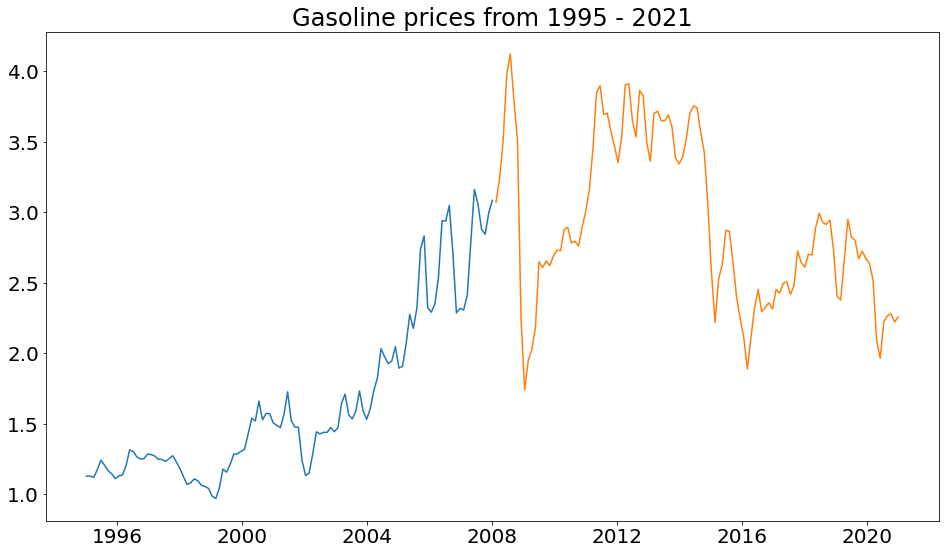

In [14]:
plt.title(f'Gasoline prices from 1995 - 2021')
plt.plot(train['gasoline'])
plt.plot(validate['gasoline'])
plt.plot(test['gasoline'])
plt.show()

Based on the data, gasoline prices on 2021 were 2.99. prices that were similar to that price in the past were in 2007.

In an attempt to predict price based on the average price of gasoline we will run it through multiple Modeling functions.

### Moving Average
In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.

In [15]:
#Make Predictions

#Gasoline(prices): establishing the value of the prediction we will make

def make_predictions(gas=None, diesel=None):
    yhat_df = pd.DataFrame({'gasoline': [gas],
                           'diesel': [diesel]},
                          index=validate.index)
    return yhat_df
# demonstrate that the mean of the month 
# rolling monthly prices
period = 30
train['gasoline'].rolling(period).mean()[-1]

# take monthly rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_gas = round(train['gasoline'].rolling(period).mean()[-1], 2)
rolling_diesel = round(train['diesel'].rolling(period).mean()[-1], 2)
yhat_df = make_predictions(rolling_gas, rolling_diesel)

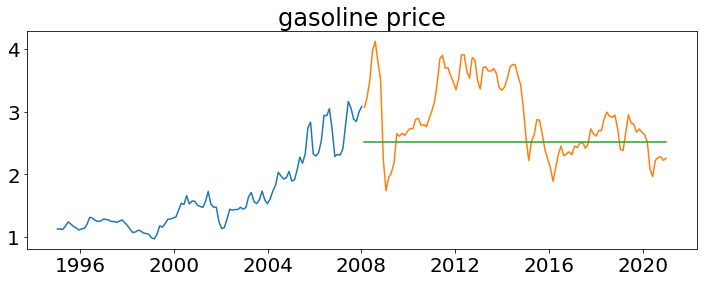

In [16]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train['gasoline'])
    plt.plot(validate['gasoline'])
    plt.plot(yhat_df['gasoline'])
    plt.title('gasoline price')
    #rmse = evaluate(target_var)
    #print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

plot_and_eval(col)

# Takeaways:
- While the predicting data is from 1995 to 2008, I can conlcude that it has done a fairly goodjob of predicting future gas prices.
- It has failed in the sense that those predictions are only true about ten times in the 13 year period it is suppose to be predicting and that is not good enough.

***

# Conclusion
Throuhgout the exploration and visualization process I realize that extreme economic events like the 2008 economic crash played huge factors in gas price drops.
In conclusion, because of extreme factors like this I was not successful in making a good predictive model that had a huge success rate.
# Recommendations
- My recommendations for the future would be to collect more data over the next comming years, wait to see if results of the current inflation in our economic state returns a similar result as the last and build a better predictive figure and model.
- The other recommendation that we can explore is to use other modeling and explorartion techniques using relationships that exists in the original csv file to predict the prices.
# END Of PROJECT